In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('Training Dataset_100k.csv')

# Quick look at data
print(df.head())
print(df.info())
print(df.describe())


   StudyHours  Attendance  PreviousScore  AssignmentScore  WritingSkills  \
0         2.9        79.0           49.8             32.6              2   
1         5.8        76.3           62.1             27.6             10   
2         4.7        67.6           36.9             31.0              8   
3         4.0        74.7           61.3             57.9              7   
4         1.8        68.3           44.2             90.8             10   

   ReadingSkills  ComputerSkills  PercentScore Grade Pass/Fail  
0              3               2         43.84     F      Fail  
1              4               2         66.50     B      Pass  
2              8               2         57.44     C      Pass  
3              5               3         62.48     B      Pass  
4              7               7         62.70     B      Pass  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtyp

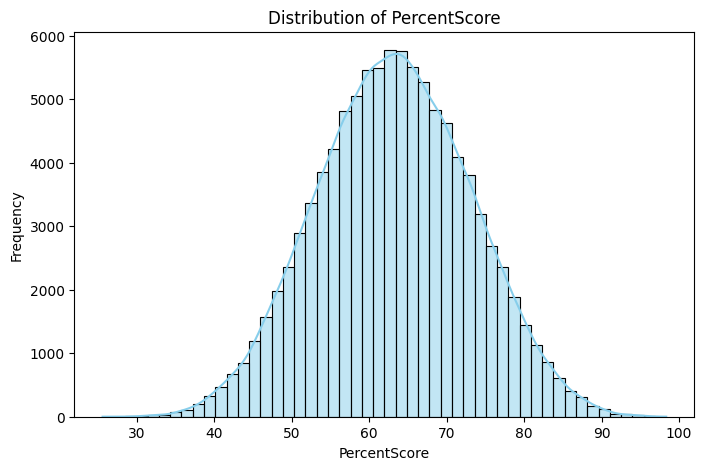

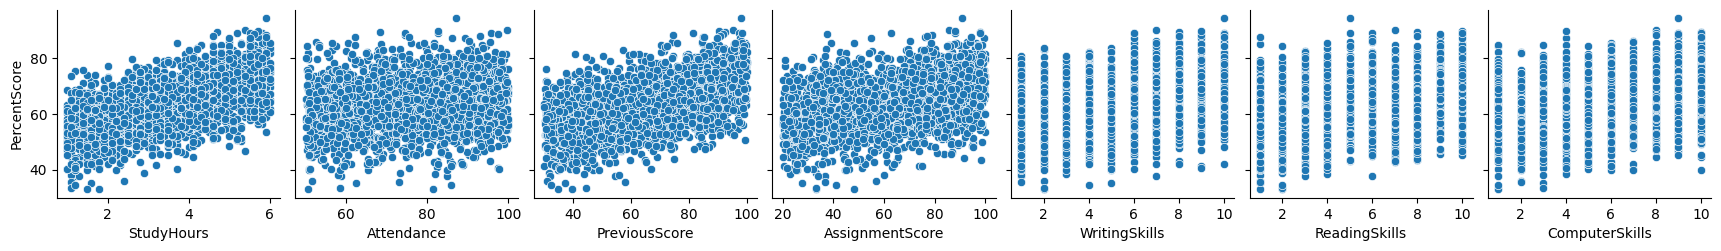

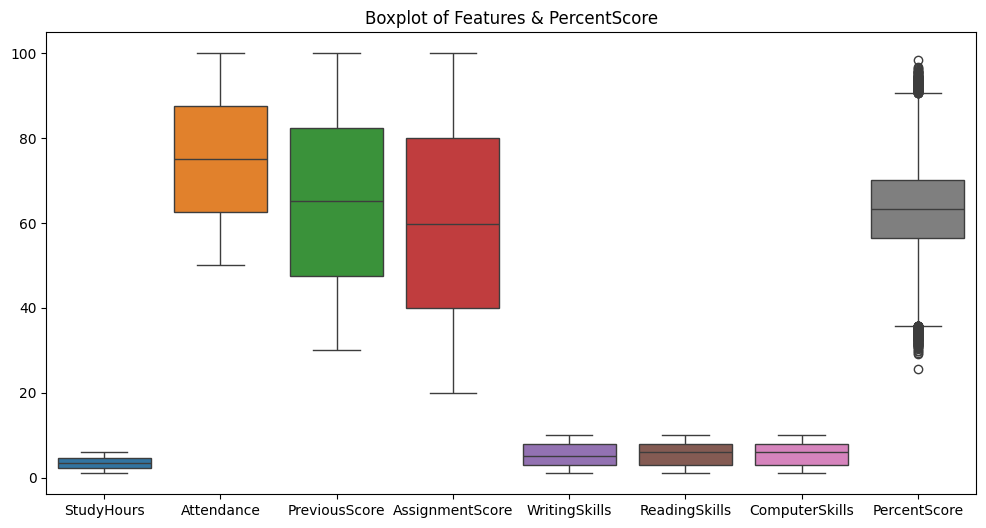

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)

# Distribution of PercentScore
plt.figure(figsize=(8,5))
sns.histplot(df['PercentScore'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of PercentScore')
plt.xlabel('PercentScore')
plt.ylabel('Frequency')
plt.show()

# 2 Pairplot for features vs PercentScore (optional for large data, can sample)
sample_df = df.sample(2000, random_state=42)
sns.pairplot(sample_df, x_vars=['StudyHours','Attendance','PreviousScore','AssignmentScore',
                                'WritingSkills','ReadingSkills','ComputerSkills'], 
             y_vars='PercentScore', kind='scatter', height=2.5)
plt.show()

#  Boxplots to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['StudyHours','Attendance','PreviousScore','AssignmentScore',
                     'WritingSkills','ReadingSkills','ComputerSkills','PercentScore']])
plt.title('Boxplot of Features & PercentScore')
plt.show()


In [7]:
# Step 1: Import Libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [8]:
# Step 2: Features and Target
X = df[['StudyHours','Attendance','PreviousScore','AssignmentScore',
        'WritingSkills','ReadingSkills','ComputerSkills']]
y = df['PercentScore']

# Train/Test Split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 3: Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

In [10]:
# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='r2')

In [11]:
print("5-Fold CV R2 Scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())

5-Fold CV R2 Scores: [0.99844192 0.9984283  0.99849789 0.99852234 0.99847043]
Mean CV R2 Score: 0.9984721776206339


In [12]:
# Fit model on full training data
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# Step 4: Predictions on Test Set
y_pred = xgb_model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Model Performance on Test Set:")
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Performance on Test Set:
RMSE: 0.36744734624333797
R2 Score: 0.998614006404989


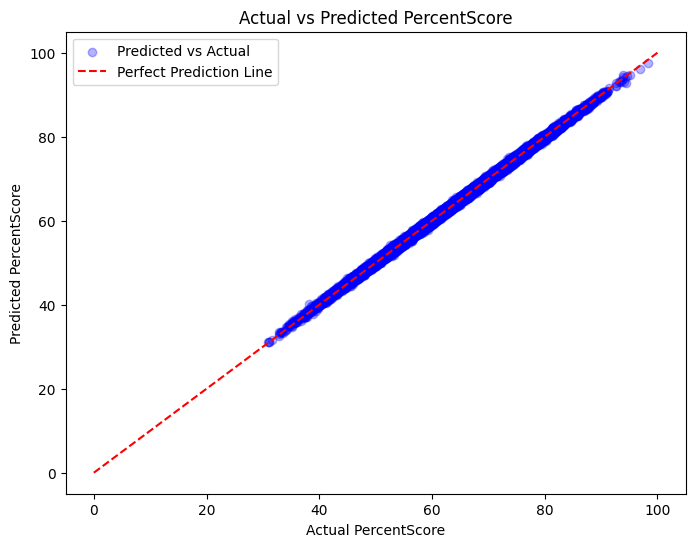

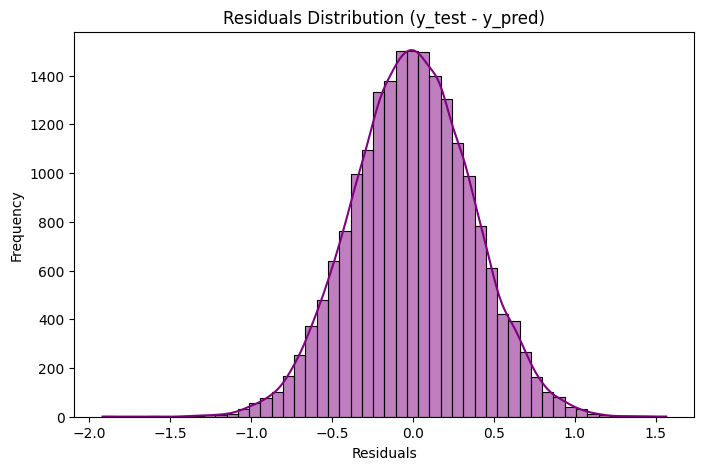

In [14]:
# Step 5: Visualization of Actual vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue", label="Predicted vs Actual")
plt.plot([0,100],[0,100], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual PercentScore")
plt.ylabel("Predicted PercentScore")
plt.title("Actual vs Predicted PercentScore")
plt.legend()
plt.show()

# Residual Plot (Error Distribution)
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True, color="purple")
plt.title("Residuals Distribution (y_test - y_pred)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [15]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "xgb_student_model.pkl")

print("✅ Model saved as xgb_student_model.pkl")

✅ Model saved as xgb_student_model.pkl


In [16]:
# Load the model
loaded_model = joblib.load("xgb_student_model.pkl")

# Predict on few samples
sample_pred = loaded_model.predict(X_test[:5])
print("🔮 Sample Predictions:", sample_pred)

# Compare with actual
print("🎯 Actual:", y_test[:5].values)


🔮 Sample Predictions: [54.758614 54.883953 73.38336  70.54629  50.482468]
🎯 Actual: [54.38 54.76 73.62 70.87 51.02]
